### Gradient Descent
The following example has training data belonging to two classes - RED and GREEN. Gradient descent is implemented to obtain the model. Sigmoid function is used to predict 

#### Dataset Preperation

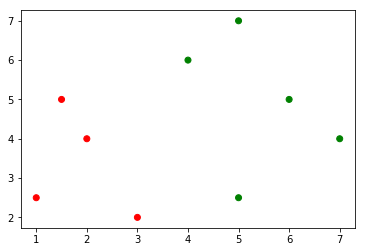

In [154]:
import matplotlib.pyplot as plt
import numpy as np

# Training Dataset
x_input = [[1,2.5], [1.5,5],[2,4],[3,2],[4,6],[5,2.5],[5,7],[6,5],[7,4]]
output = [0,0,0,0,1,1,1,1,1]
x,y = zip(*x_input)
color_arr = np.empty(len(output), dtype='str')
for i in range(len(output)):
    if output[i] == 0:
        color_arr[i] = 'red'
    else:
        color_arr[i] = 'green'
plt.scatter(x,y, color=color_arr)
plt.show()

#### Function definition

In [155]:
# Sigmoid function = 1/(1+e^z)
# z = -(x1.w1+x2.w2 + b)
def sigmoid(input_arr, w_arr, b):
    z = -(np.matmul(input_arr,w_arr) + b)
    return 1/(1+np.exp(z))

# Activation function defined as follows
# a(x) = 1 if x>0.5
# a(x) = 0 if x<=0.5
def activation_function(x):
    y = 0
    if x>0.5 :
        y = 1
    return y

#Prediction function
def predict(input_arr, w_arr, b):
    x = sigmoid(input_arr, w_arr, b)
    print('Sigmoid result: ', x)
    x = activation_function(x)
    if x is 0:
        return 'red'
    else:
        return 'green'

#### Training using Gradient Descent 

Initial weights:  [0.27035706 0.22351304]
g: [ 0.1   0.15  0.2   0.25  0.3   0.4   0.5   0.6   0.8   1.    1.5   2.
  2.5   3.    4.    5.    6.    8.   10.   15.  ]
actual:  0 , predicted:  0.696172987731071 , err:  -0.696172987731071 , srq err:  0.4846568288464059
actual:  0 , predicted:  0.8062205365699899 , err:  -0.8062205365699899 , srq err:  1.1346483824336084
actual:  0 , predicted:  0.7623840692440531 , err:  -0.7623840692440531 , srq err:  1.7158778514707296
actual:  0 , predicted:  0.7268636317795545 , err:  -0.7268636317795545 , srq err:  2.2442085906744933
actual:  1 , predicted:  0.8294287463765752 , err:  0.17057125362342485 , srq err:  2.27330314323716
actual:  1 , predicted:  0.807345731359552 , err:  0.192654268640448 , srq err:  2.3104188104625463
actual:  1 , predicted:  0.8913136158592847 , err:  0.1086863841407153 , srq err:  2.3222315405601295
actual:  1 , predicted:  0.894159279250936 , err:  0.10584072074906403 , srq err:  2.333433798728811
actual:  1 , predict

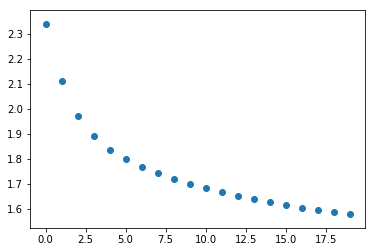

final weights: [ 0.47162679 -0.17227143]


In [156]:
learning_rate = 0.01
epochs = 20
w = np.random.random_sample((2,))
print('Initial weights: ',w)
def train_weights(input_, output_, wts, epochs):
    gradient_array = np.empty([epochs,])
    right_wts = np.empty([2,])
    print('g:',gradient_array)
    prev_err_sqr = 9999
    for i in range(epochs):
        err_sqr = 0
        for j in range(len(input_)):
            curr_input = input_[j]
            predicted_value = sigmoid(curr_input, wts, 0)
            err = output_[j] - predicted_value
            err_sqr = err_sqr + err ** 2
            print('actual: ', output_[j],', predicted: ', predicted_value, ', err: ', err, ', srq err: ', err_sqr)
            wts[0] = wts[0] + learning_rate*err*curr_input[0]
            wts[1] = wts[1] + learning_rate*err*curr_input[1]
        gradient_array[i] = err_sqr
        if err_sqr < prev_err_sqr:
            right_wts = wts
            prev_err_sqr = err_sqr
    print('gradient array: ', gradient_array)    
    plt.scatter(np.arange(epochs),gradient_array)
    plt.show()
    return right_wts

w_trained = train_weights(x_input, output, w, epochs)
print('final weights:', w_trained)

#### Prediction

Sigmoid result:  0.23853784569949876
Prediction: Blue is red
Sigmoid result:  0.9393110911913737
Prediction: Yellow is green


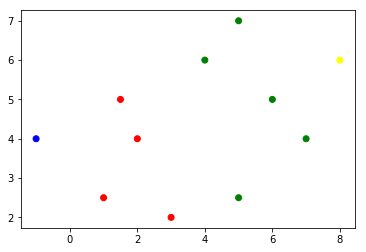

In [157]:
# Prediction
input_to_predict1 = [-1,4]
peridiction = predict(input_to_predict1, w_trained, 0)
print('Prediction: Blue is '+ peridiction)

input_to_predict2 = [8,6]
peridiction = predict(input_to_predict2, w_trained, 0)
print('Prediction: Yellow is '+ peridiction)

x_input.append(input_to_predict1)
x_input.append(input_to_predict2)
color_arr = np.append(color_arr,'blue')
color_arr = np.append(color_arr,'yellow')

x,y = zip(*x_input)
plt.scatter(x,y, color=color_arr)
plt.show()